# Data Mining 2021 Project - Group AD 

#### David Sotto Mayor, Debora Santos, Diana Furtado

# Libraries

In [1]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install pandas_profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27090 sha256=c92121bf44eff781f078907b68aa6cb5334aa1415cda985e2aaa02d9827f48e9
  Stored in directory: c:\users\diana\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243

  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295204 sha256=d5201dbb3b53a5e309c11c84dc188ee3a2e34af9530a24d5d1c03acfa36f2152
  Stored in directory: c:\users\diana\appdata\local\pip\cache\wheels\48\a1\7f\096c1269d6bf78d4768180602579b35a1e8cb1250bb4b40c74
Successfully built htmlmin imagehash
  Attempting uninstall: joblib
    Found existing installation: joblib 0.16.0
    Uninstalling joblib-0.16.0:
      Successfully uninstalled joblib-0.16.0
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1


ERROR: phik 0.12.0 has requirement scipy>=1.5.2, but you'll have scipy 1.5.0 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Diana\\anaconda3\\Lib\\site-packages\\~arkupsafe\\_speedups.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [9]:
#IMPORT LIBRARIES
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder, RobustScaler
from itertools import product
from math import ceil
from scipy.cluster.hierarchy import dendrogram
%matplotlib inline

#from pandas_profiling import ProfileReport
%config InlineBackend.figure_format = 'retina'
from scipy.stats import iqr as IQR
from collections import Counter
from sklearn.base import clone
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score

#import phik
import matplotlib.cm as cm
from sklearn.manifold import TSNE

#outliers detection
from scipy import stats
from sklearn.neighbors import LocalOutlierFactor
from sklearn import svm
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeClassifier
from os.path import join
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Seeting seaborn style
sns.set()

In [2]:
import pyreadstat

# Import data

In [31]:
# Read the sas7bdat file
insurance, meta = pyreadstat.read_sas7bdat('a2z_insurance.sas7bdat')
type(insurance)
insurance.head()

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,1982.0,2 - High School,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,1995.0,2 - High School,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,1970.0,1 - Basic,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,1981.0,3 - BSc/MSc,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,1973.0,3 - BSc/MSc,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


In [32]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10296 non-null  float64
 1   FirstPolYear   10266 non-null  float64
 2   BirthYear      10279 non-null  float64
 3   EducDeg        10296 non-null  object 
 4   MonthSal       10260 non-null  float64
 5   GeoLivArea     10295 non-null  float64
 6   Children       10275 non-null  float64
 7   CustMonVal     10296 non-null  float64
 8   ClaimsRate     10296 non-null  float64
 9   PremMotor      10262 non-null  float64
 10  PremHousehold  10296 non-null  float64
 11  PremHealth     10253 non-null  float64
 12  PremLife       10192 non-null  float64
 13  PremWork       10210 non-null  float64
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [33]:
insurance.to_csv('a2z_insurance.csv')

In [34]:
# Drop categoric columns
insurance1 = insurance.drop(['EducDeg', 'GeoLivArea', 'Children'], axis=1)
insurance1

,CustID,FirstPolYear,BirthYear,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,1982.0,2177.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,1995.0,677.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,1970.0,2277.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,1981.0,1099.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,1973.0,1763.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...,...,...,...,...,...,...
10291,10292.0,1984.0,1949.0,3188.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10292,10293.0,1977.0,1952.0,2431.0,1405.60,0.00,133.58,1035.75,143.25,12.89,105.13
10293,10294.0,1994.0,1976.0,2918.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89
10294,10295.0,1981.0,1977.0,1971.0,250.05,0.65,188.59,211.15,198.37,63.90,112.91


In [35]:
# Check % of missing values in each column
# As NA
missing_NA = insurance1.isna().sum()/len(df1)*100
missing_NA[missing_NA > 0].sort_values()

BirthYear       0.165113
FirstPolYear    0.291375
PremMotor       0.330225
MonthSal        0.349650
PremHealth      0.417638
PremWork        0.835276
PremLife        1.010101
dtype: float64

In [36]:
# As " "
missing_empty = pd.DataFrame(insurance1 == ' ').sum()/len(df1)*100
missing_empty[missing_empty > 0].sort_values()

Series([], dtype: float64)

# Correlation

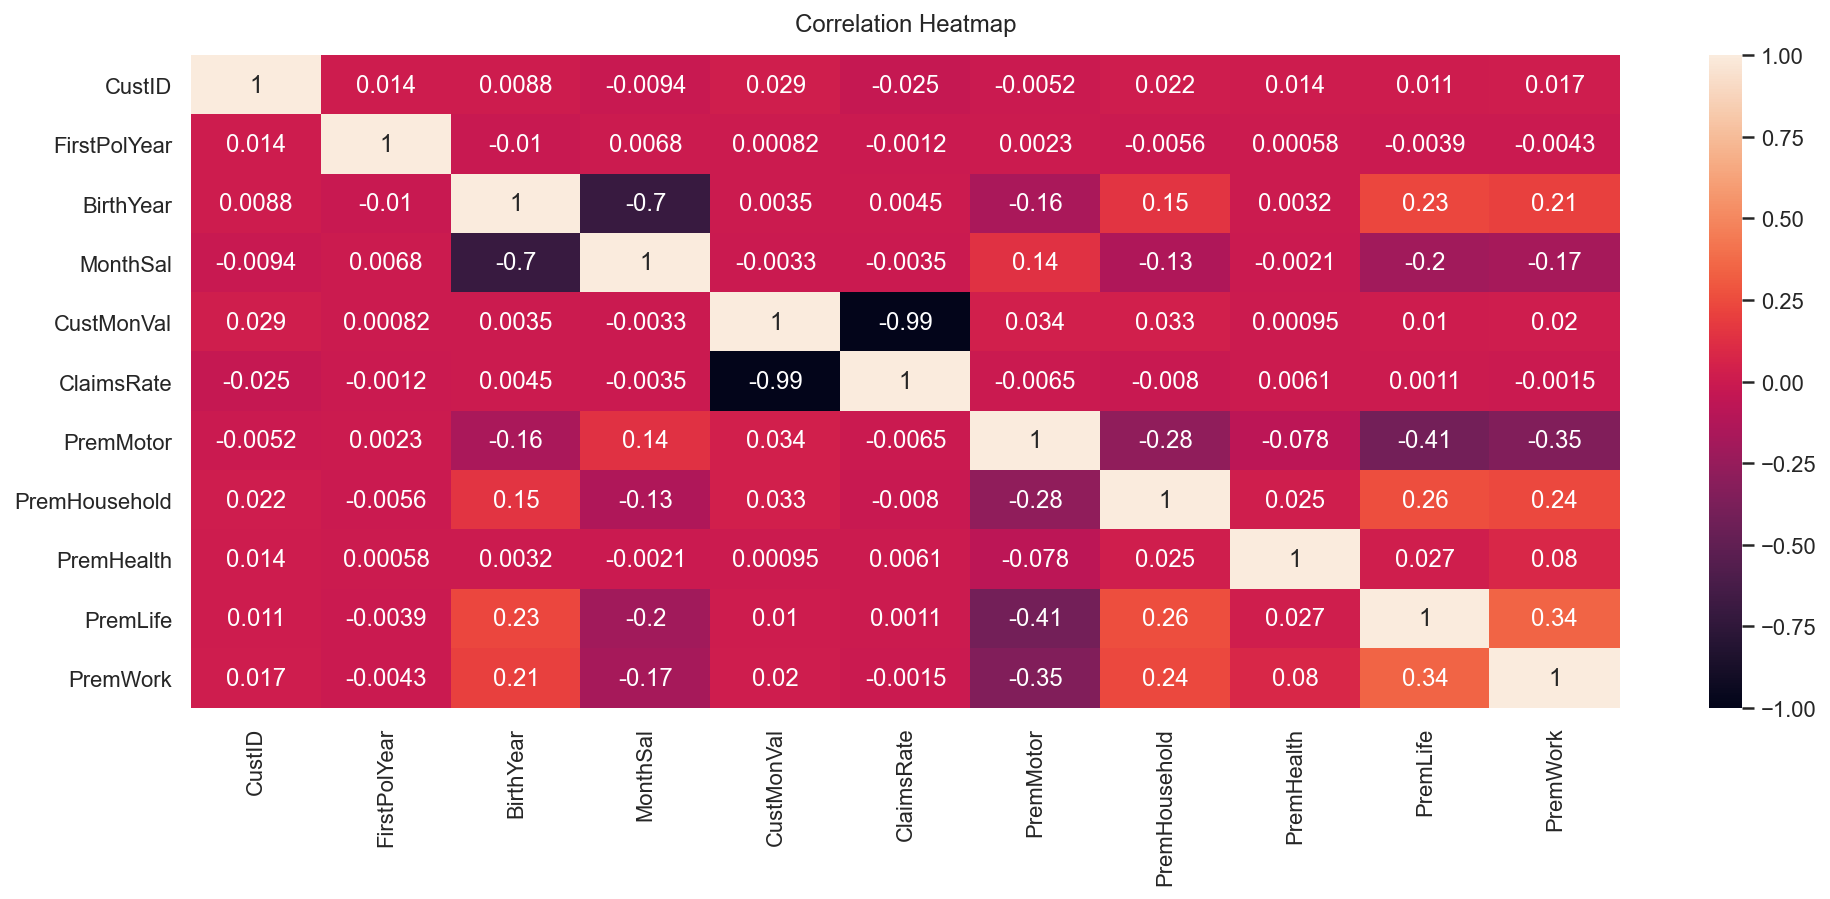

In [37]:
# Pearson correlation heatmap (numeric features)
plt.figure(figsize=(16, 6))
corr = sns.heatmap(insurance1.corr(), vmin=-1, vmax=1, annot=True)
corr.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Data Cleaning

In [39]:
insurance1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10296 non-null  float64
 1   FirstPolYear   10266 non-null  float64
 2   BirthYear      10279 non-null  float64
 3   MonthSal       10260 non-null  float64
 4   CustMonVal     10296 non-null  float64
 5   ClaimsRate     10296 non-null  float64
 6   PremMotor      10262 non-null  float64
 7   PremHousehold  10296 non-null  float64
 8   PremHealth     10253 non-null  float64
 9   PremLife       10192 non-null  float64
 10  PremWork       10210 non-null  float64
dtypes: float64(11)
memory usage: 884.9 KB


In [42]:
metric = insurance1.select_dtypes(include = ['int64', float]).columns.to_list()
non_metric = insurance1.select_dtypes(exclude = ['int64', float]).columns.to_list()

In [44]:
scaler = StandardScaler()
scaled = scaler.fit_transform(insurance1[metric])
imputer = KNNImputer(weights='distance', n_neighbors=100)
imputer.fit(scaled)
imputed_metric = imputer.transform(scaled)
insurance1.loc[:,metric] = scaler.inverse_transform(imputed_metric)

In [45]:
insurance1.isna().sum().sum()

0